In [1]:
#load all the necessary libraries
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

## Taylor's Theorem

1) Let us start easy. Give me a numpy array from -$\pi$ to +$\pi$. You can use math.PI for $\pi$. Let us called it `xs`

In [3]:
xs = np.linspace(-math.pi,math.pi)

2) Built another numpy array called `ys` which is just the sin of `xs`

In [11]:
ys = np.sin(xs)

3) Plot `xs` vs `ys`

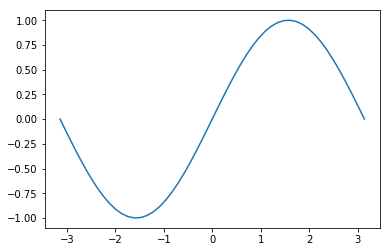

In [10]:
plt.plot(xs,ys)

4) Plot 
$\begin{align} 
g(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} 
\end{align}$

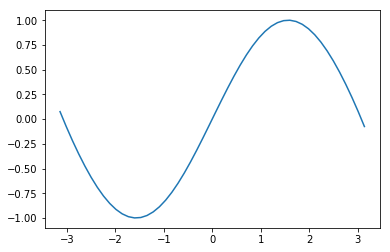

In [15]:
fac = math.factorial
g_x= xs - xs**3/fac(3) + xs ** 5/fac(5) - xs**7/fac(7)
plt.plot(xs,g_x)

5) Plot g(x) and sin(x) on the same axis

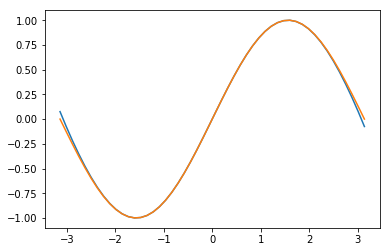

In [17]:
plt.plot(xs,g_x)
plt.plot(xs,ys)

6) Plot the $\sin$ function and the taylor series approximation( 1 term ) on the same axis

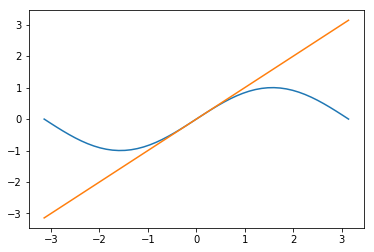

In [20]:
g_x= xs
plt.plot(xs,ys)
plt.plot(xs,g_x)

7) Plot the $\sin$ function and the taylor series approximation( 2 terms ) on the same axis

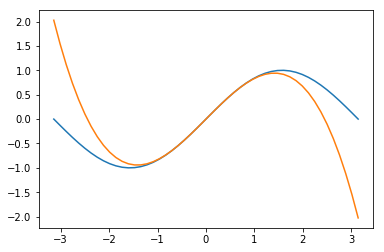

In [22]:
g_x= xs - xs**3/fac(3) 
plt.plot(xs,ys)
plt.plot(xs,g_x)

8) Plot the $\sin$ function and the taylor series approximation( 3 term ) on the same axis

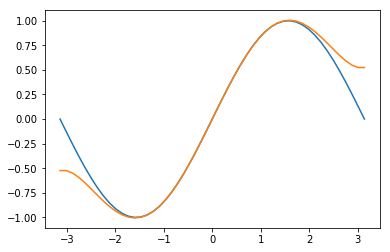

In [23]:
g_x= xs - xs**3/fac(3) + xs ** 5/fac(5)
plt.plot(xs,ys)
plt.plot(xs,g_x)

9) Plot the $\sin$ function and the taylor series approximations(1,2,3,4 terms ) on the same axis. You can see that we get more and more accurate as we add more terms.

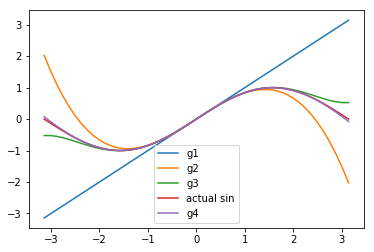

In [28]:
g_x1= xs

plt.plot(xs,g_x1,label ='g1')

g_x2= xs - xs**3/fac(3) 

plt.plot(xs,g_x2, label ='g2')

g_x3= xs - xs**3/fac(3) + xs ** 5/fac(5)

plt.plot(xs,g_x3, label='g3')

g_x4= xs - xs**3/fac(3) + xs ** 5/fac(5) - xs**7/fac(7)
plt.plot(xs,ys, label = 'actual sin') #sin 
plt.plot(xs,g_x4, label='g4')
plt.legend()

10) Write down the Taylor's theorem and what exactly is the squigly symbol $\xi$?

In [29]:
np.sin(0.5)-0.5

-0.020574461395796995

11) If we use only the two terms in the approximation, what is the bound on the uncertainty/error for approximating $\sin(0.5)$. Verify this numerically as well.

12) Why don't we use abs(math.sin(0.5) - youranswer) to calculate the uncertainty?

13) If we want to approximate $\sin(0.5)$ that is accurate up to $10^{-7}$. How many terms do we need?

In [31]:
def error(n):
    return 1* 0.5**(n+1)/fac(n+1)
for i in range(10):
    if error(i) < 1e-7:
        print(i,error(i))
        break

7 9.68812003968254e-08


# Numerical Derivative

1) Let $f(x) = x^3$ analytically calculate $f'(0.5)$.

In [32]:
3*0.5**2

0.75

2) Use forward finite difference to approximate $f'(0.5)$ with $h=0.1$

In [34]:
def forward_diff(f,x,h):
    return (f(x+h)-f(x))/h
def func(x):
    return x**3
forward_diff(func,0.5,0.1)

0.9099999999999997

3) Use forward finite difference to approximate $f'(0.5)$ with $h=0.001$

In [35]:
forward_diff(func,0.5,0.001)

0.7515009999999878

4) Plot $f'(x)$ for $h=0.1$ and $h=0.001$ and analytic one

5) Use centered finite difference to approximate $f'(0.5)$ with $h=0.1$

In [40]:
def centered_diff(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)

print(centered_diff(func,0.5,0.001))
print(forward_diff(func,0.5,0.001))


0.7500009999999931
0.7515009999999878


6) How about 

$$
 \frac{-f(x+2h) + 8 f(x+h) - 8 f(x-h) + f(x-2h)}{12 h}
$$

In [43]:
def magic_diff(f,x,h):
    return 1/(12*h) * (-f(x+2*h)+8*f(x+h)-8*f(x-h)+f(x-2*h))
#too small is bad
h= 1e-100
print("magic", magic_diff(func,0.5,h))
print("center",centered_diff(func,0.5,h))
print("fwd",forward_diff(func,0.5,h))

h= 0.001
print("magic", magic_diff(func,0.5,h))
print("center",centered_diff(func,0.5,h))
print("fwd",forward_diff(func,0.5,h))


magic 0.0
center 0.0
fwd 0.0
magic 0.7499999999999902
center 0.7500009999999931
fwd 0.7515009999999878


7) Let $f(x) = \sin(x)$ analytically know that $f'(x)=\cos(x)$. Plot $\cos(x)$ along with the derivative of $\sin(x)$ obtained from finite difference. Pick a reasonable value for $h$ and plotting range.

In [1]:
def diff2(f,x,h):
    return (f(x+2*h) -2*f(x)+f(x-2*h))/(4*h**2)

8) Find $f''(0.5)$ for $f(x) = x^5$ using centered finite difference for $h=0.05$

2.549999999999998
2.5


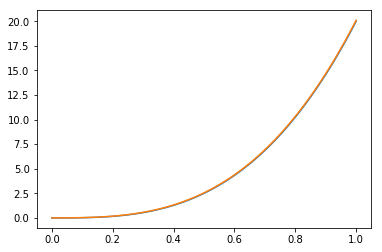

In [47]:
def x_5(x):
    return x**5

print(diff2(x_5,0.5,0.05))
print(5*4*0.5**3)

xs= np.linspace(0,1,100)
actual = [5*4*x**3 for x in xs]
approx = [diff2(x_5,x,0.05)for x in xs]
plt.plot(xs,actual)
plt.plot(xs,approx)

9) Given that formula what is the convergence rate? 

10) What can go wrong if $h$ is really really small?

# Newton's method with numerical derivative

1) Write a function
```def newton(f, start, n):```
that try to find solution of $f(x)=0$ given starting point at $x = start$ for n iteration. But this time you don't need to supply $f'(x)$ by hands.

Try it on our usual suspect: solving $x = \cos(x)$

In [48]:
def newton(f,start,n):
    guess = start
    h=0.001
    for i in range(n):
        fp = (f(guess+h)-f(guess-h))/(2*h)
        guess = guess - f(guess)/fp
    return guess
def prob(x):
    return x- np.cos(x)

newton(prob,0.1,5)

0.7390851332151607

# Edge Detection

1) Read in Mario.png
```
im = plt.imread(filename)
plt.imshow(im)
```

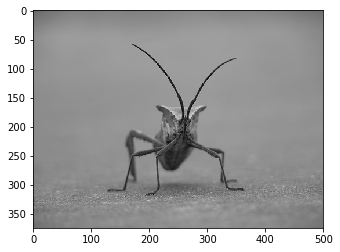

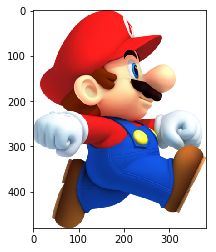

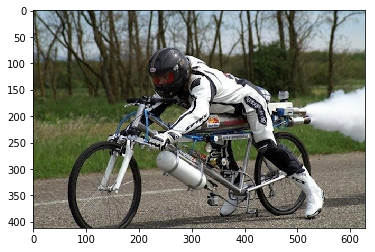

In [73]:
stinkbug = plt.imread('stinkbug.png')
mario = plt.imread('mario.png')
rocket = plt.imread('rocket-bicycle.png')
plt.imshow(stinkbug)
plt.figure()
plt.imshow(mario)
plt.figure()
plt.imshow(rocket)

2) The dimension of each output is the following: Can you guess what each dimension means?

or read this http://matplotlib.org/api/image_api.html

In [50]:
mario.shape

(480, 381, 4)

3) Try to get a pixel on mario hat. It should be really close to red [1,0,0,1]. Note that the first dimesion is actually y not x.
```
    mario[y,x]
```

4) You can make a big blob in the image too
```
    mario [10:20,30:40] = np.array([0,1,0,1]) #green
```
this changes the image array where the first index is 10 to 20 and second index from 30 to 40 all to green. This is called chunk assignment. Quite convenient.

Try imshow after you edit. If you need to reset mario, do 
```
mario = plt.imread('mario.png')
```


In [70]:
# mario [20:80, 150:200] = np.array([0,1,0,1])
# plt.imshow(mario)

5) What defines an edge? What quantity distinguish the pixel in the middle of the hat and the pixel separating the hat and his ear?

In [2]:
def mex_edge(y,x):
    center = mario[y,x]
    left = mario[y,x-1]
    right = mario[y,x+1]
    top = mario[y-1,x]
    bottom = mario[y+1,x]
    
    score = np.sum((center-left) ** 2)
    score += np.sum((center-right) ** 2)
    score += np.sum((center-top) ** 2)
    score += np.sum((center-bottom) ** 2)
   
    return score

mex_edge(300,200)

NameError: name 'mario' is not defined

6) Write a function that given location $y,x$ and then calculate how "likely" it is that pixel x,y is an edge pixel.

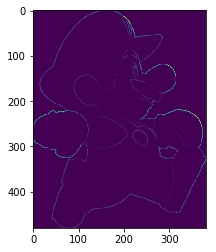

In [75]:
ny,nx,nc = mario.shape
edge_pic = np.zeros((ny,nx))
for iy in range(1,ny-1):
    for ix in range(1,nx-1):
        edge_pic[iy,ix] = mex_edge(iy,ix)
plt.imshow(edge_pic)
        

0.05011914108007879


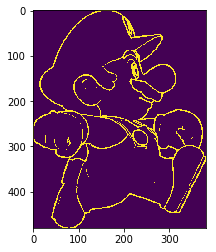

In [79]:
tmp = edge_pic.copy()
print(np.average(tmp))
mask = tmp > 0.05
tmp[mask]=1
tmp[~mask]=0
plt.imshow(tmp)

7) Make an empty 3d array of (ydimension, xdimension, ncolor). Then start putting in each pixel with the size of gradient.

8) Show the result.